In [8]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

import abtem
import matplotlib.pyplot as plt
import numpy as np
from dask.distributed import Client
import ase

abtem.config.set({"device":"gpu"})
abtem.config.set({"fft":"mkl"})

In [9]:
abtem.config.set({"distributed.scheduler.worker-saturation":"1"})


In [11]:
#from dask.distributed import Client

#client = Client(n_workers=1)
#client

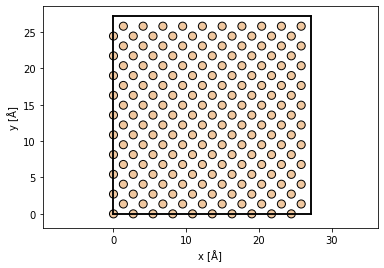

In [12]:
atoms = ase.build.bulk("Si", cubic=True)

#atoms = ase.build.surface(atoms, indices=(1, 1, 0), layers=3, periodic=True)

atoms = abtem.orthogonalize_cell(atoms)

atoms *= (5, 5, 1)

abtem.show_atoms(atoms, plane="xy", scale=0.5);

In [17]:
fp = abtem.FrozenPhonons(atoms, sigmas=.2, num_configs=100)

potential = abtem.Potential(fp, gpts=(1024, 1024), slice_thickness=10)

s_matrix = abtem.SMatrix(
    potential=potential,
    energy=150e3,
    planewave_cutoff=20,
    interpolation=4,
    store_on_host=True,
)

s_matrix.build().array

,Array,Chunk
Bytes,24.05 GiB,217.74 MiB
Shape,"(100, 69, 684, 684)","(1, 61, 684, 684)"
Count,303 Graph Layers,200 Chunks
Type,complex64,cupy.ndarray


In [18]:
measurement = s_matrix.scan(multislice_max_batch=20).compute(num_workers=1) #array.visualize(engine="cytoscape", color="order")

[########################################] | 100% Completed | 287.18 s


In [12]:
measurement = s_matrix.scan(multislice_max_batch=2000).compute()

In [16]:
measurement.array.shape

(82, 82, 248, 1)

(<Figure size 864x864 with 2 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

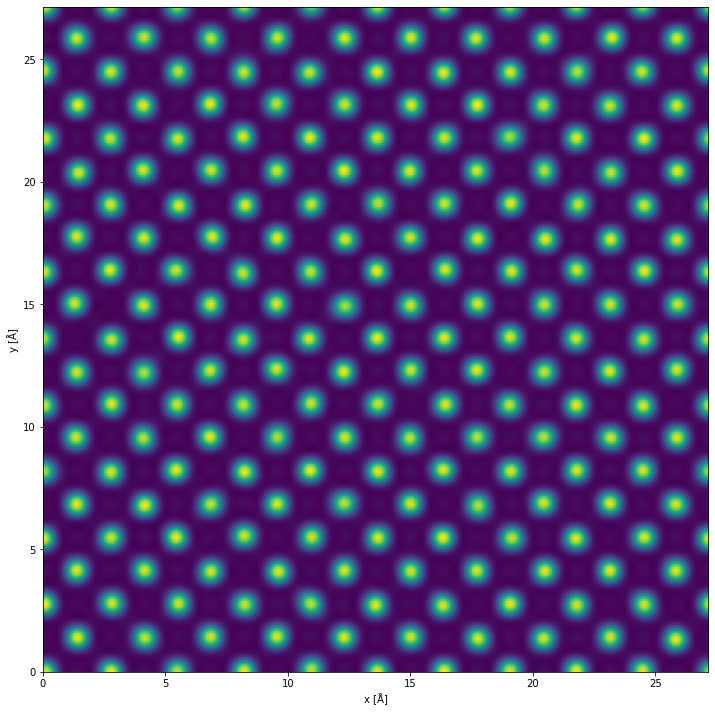

In [15]:
measurement.integrate_radial(50,100).interpolate(.1).show(figsize=(12,12))